### What is SVM?

Support Vector Machines (SVMs in short) are supervised machine learning algorithms that are used for classification and regression purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using the kernel trick. It enable us to implicitly map the inputs into high dimensional feature spaces.

- How does SVM Work?

    - Hyperplane-A hyperplane is a decision boundary which separates between given set of data points having different class labels. The SVM classifier separates data points using a hyperplane with the maximum amount of margin. This hyperplane is known as the maximum margin hyperplane and the linear classifier it defines is known as the maximum margin classifier.

    - Support Vectors- Support vectors are the sample data points, which are closest to the hyperplane. These data points will define the separating line or hyperplane better by calculating margins.

    - Margin-A margin is a separation gap between the two lines on the closest data points. It is calculated as the perpendicular distance from the line to support vectors or closest data points. In SVMs, we try to maximize this separation gap so that we get maximum margin.
    
- Main goal of SVMs- our main goal is to select a hyperplane with the maximum possible margin between support vectors in the given dataset.

    - SVM searches for the maximum margin hyperplane using the following steps –

        - Generate hyperplanes which segregates the classes in the best possible way. We should look for the best hyperplane that represents the largest separation, or margin, between the two classes.

        - Choose the hyperplane so that distance from it to the support vectors on each side is maximized. If such a hyperplane exists, it is known as the maximum margin hyperplane and the linear classifier it defines is known as a maximum margin classifier.
        
- Kernel

    - When the sample data points are very dispersed, it is not possible to separate them using a linear hyperplane. In such a situation, SVMs uses a kernel trick to transform the input space to a higher dimensional space. It uses a mapping function to transform the 2-D input space into the 3-D input space. Then, data points can be easilty seggregated using linear separation.

    - In practice, kernel is just a function that maps the data to a higher dimension where data is separable. So, it converts non-linear separable problems to linear separable problems by adding more dimensions to it. Thus, the kernel trick helps us to build a more accurate classifier. Hence, it is useful in non-linear separation problems.
    
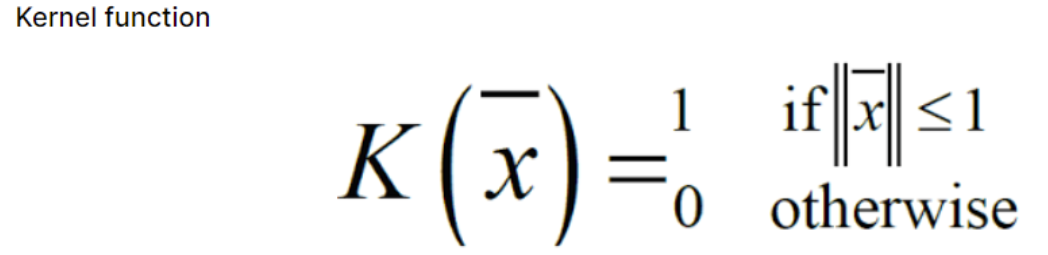


- Types of kernels

    - Linear kernel
        - Linear kernel is used when the data is linearly separable. It means that data can be separated using a single line. It is one of the most common kernels to be used. It is mostly used when there are large number of features in a dataset. Linear kernel is often used for text classification purposes. Training with a linear kernel is usually faster, because we only need to optimize the C regularization parameter. When training with other kernels, we also need to optimize the γ parameter. So, performing a grid search will usually take more time. Linear kernel functions are faster than other functions.
        - Linear Kernel formula:F(x,x_j) = sum(x.x_j), here x.x_j represents the data that we are trying to classify.
        
    - Polynomial Kernel

        - Polynomial kernel represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables. The polynomial kernel looks not only at the given features of input samples to determine their similarity, but also combinations of the input samples. Polynomial kernel is very popular in Natural Language Processing. The most common degree is d = 2 (quadratic), since larger degrees tend to overfit on NLP problems. 

        - Polynomial kernel formula: F(x,x_j) = (x.x_j+1)^d

        - Here ‘.’ shows the dot product of both the values, and d denotes the degree. F(x,x_j) representing the decision boundary to separate the given classes.
        
    - Gaussian Radial Basis Function (RBF)

        - It is one of the most preferred and used kernel functions in svm. It is usually chosen for non-linear data. It helps to make proper separation when there is no prior knowledge of data.

        - Gaussian Radial Basis Formula:F(x, x_j) = exp(-gamma * ||x - x_j||^2)

        - Here the value of gamma varies from 0 to 1. We have to manually provide the value of gamma in the code. The most preferred value for gamma is 0.1.
        
    - Sigmoid kernel

        - Sigmoid kernel has its origin in neural networks. We can use it as the proxy for neural networks. This kernel function is similar to a two-layer perceptron model of the neural network, which works as an activation function for neurons.

        - Sigmoid Kenel Function:F(x, x_j) = tanh(αxay + c)
        
    - Gaussian kernel

        - It is a commonly used kernel. It is used when there is no prior knowledge of a given dataset.

        - Gaussian kernel Function:k(x,y)=exp(-(||x-y||^2)/(2*sigma^2))
        
    - Bessel function kernel

        - It is mainly used for removing the cross term in mathematical functions.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### Load the data

In [2]:
X_train=pd.read_csv("X_train.csv",index_col=0)
X_train.shape

(6434, 12)

In [3]:
X_test=pd.read_csv("X_test.csv",index_col=0)
X_test.shape

(1250, 12)

In [4]:
y_train=pd.read_csv("y_train.csv",index_col=0)
y_train.shape

(6434, 1)

In [5]:
y_test=pd.read_csv("y_test.csv",index_col=0)
y_test.shape

(1250, 1)

### Build the base SVM model with default parameters

In [6]:
from sklearn import svm

svm1 = svm.SVC(kernel = 'rbf', #Specifies the kernel type to be used in the algorithm,default is 'rbf'
               C=1.0,          #Regularization parameter,defualt is 0.1
               gamma = 0.1     #Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
              )

svm1

SVC(gamma=0.1)

In [7]:
svm1.fit(X_train,y_train)

SVC(gamma=0.1)

In [8]:
y_pred_svm1 = svm1.predict(X_test)
len(y_pred_svm1)

1250

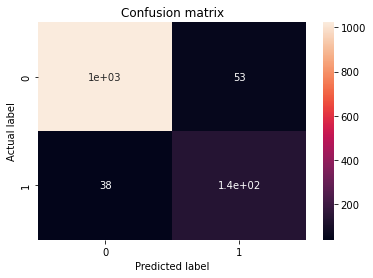

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,roc_curve, auc, roc_auc_score

cm1 = confusion_matrix(y_test,y_pred_svm1)
sns.heatmap(cm1, annot=True)
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [10]:
svm1_acc = accuracy_score(y_test,y_pred_svm1)
print("Base SVM-Accuracy:", svm1_acc)
svm1_rec = recall_score(y_test,y_pred_svm1)
print("Base SVM-Recall score:",svm1_rec)
svm1_f1 = f1_score(y_test,y_pred_svm1)
print("Base SVM-F1 score:",svm1_f1)
svm1_ps = precision_score(y_test,y_pred_svm1)
print("Base SVM-Precision score:",svm1_ps)

Base SVM-Accuracy: 0.9272
Base SVM-Recall score: 0.7816091954022989
Base SVM-F1 score: 0.7493112947658404
Base SVM-Precision score: 0.7195767195767195


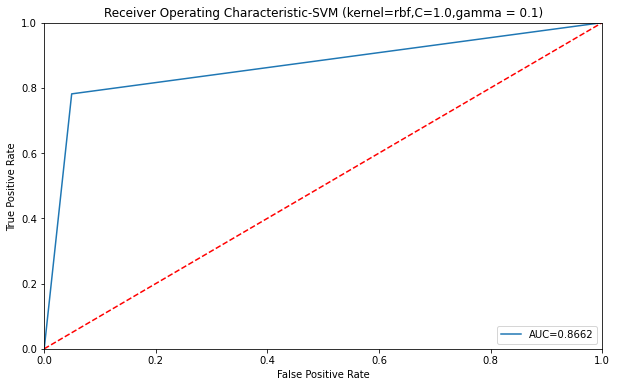

In [11]:
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test,y_pred_svm1)
auc = round(roc_auc_score(y_test,y_pred_svm1),4)

#create ROC curve
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characteristic-SVM (kernel=rbf,C=1.0,gamma = 0.1)')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Hyper parameter tuning

In [12]:
#grid search CV
from sklearn.model_selection import GridSearchCV

param_grid_svm = {'C':[1, 10, 100], 
                  'kernel':['rbf','poly'], 
                  'degree': [2,3,4],
                  'gamma':[0.06,0.07,0.08]
                }
param_grid_svm

{'C': [1, 10, 100],
 'kernel': ['rbf', 'poly'],
 'degree': [2, 3, 4],
 'gamma': [0.06, 0.07, 0.08]}

In [13]:
gs_svm = GridSearchCV(estimator=svm1,#estimator object
                  param_grid=param_grid_svm, #Tuning parameters
                  cv=10, #Integer, to specify the number of folds in a `(Stratified)KFold`
                  scoring = 'accuracy', #Evaluation metrics
                  verbose=0, #Controls the verbosity: the higher, the more messages
                  error_score='raise',
                  return_train_score=True #If False, the cv_results_ attribute will not include training scores
                 )
gs_svm

GridSearchCV(cv=10, error_score='raise', estimator=SVC(gamma=0.1),
             param_grid={'C': [1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': [0.06, 0.07, 0.08],
                         'kernel': ['rbf', 'poly']},
             return_train_score=True, scoring='accuracy')

In [14]:
gs_svm.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise', estimator=SVC(gamma=0.1),
             param_grid={'C': [1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': [0.06, 0.07, 0.08],
                         'kernel': ['rbf', 'poly']},
             return_train_score=True, scoring='accuracy')

In [15]:
df_svm = pd.DataFrame(gs_svm.cv_results_)
df_svm.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,1.033122,0.303958,0.182517,0.061833,1,2,0.06,rbf,"{'C': 1, 'degree': 2, 'gamma': 0.06, 'kernel':...",0.909938,...,0.914680,0.916753,0.915904,0.916077,0.915041,0.914868,0.916077,0.916595,0.915985,0.000816
1,0.945419,0.181902,0.057416,0.009426,1,2,0.06,poly,"{'C': 1, 'degree': 2, 'gamma': 0.06, 'kernel':...",0.858696,...,0.856649,0.860276,0.859264,0.855983,0.860128,0.858401,0.859782,0.857192,0.858460,0.001422
2,0.914826,0.093194,0.155666,0.013602,1,2,0.07,rbf,"{'C': 1, 'degree': 2, 'gamma': 0.07, 'kernel':...",0.917702,...,0.917444,0.919689,0.919876,0.918667,0.918322,0.918322,0.920048,0.920048,0.919162,0.000859
3,0.903859,0.154663,0.064810,0.012457,1,2,0.07,poly,"{'C': 1, 'degree': 2, 'gamma': 0.07, 'kernel':...",0.860248,...,0.856822,0.859758,0.859092,0.856329,0.860128,0.858746,0.860819,0.857883,0.858788,0.001340
4,0.876180,0.111401,0.159647,0.019898,1,2,0.08,rbf,"{'C': 1, 'degree': 2, 'gamma': 0.08, 'kernel':...",0.917702,...,0.919516,0.922625,0.921948,0.921430,0.919703,0.922121,0.923675,0.922293,0.921770,0.001209


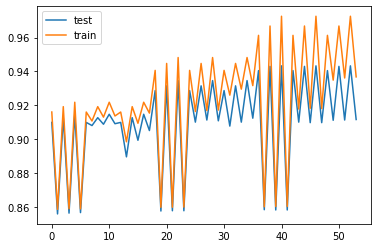

In [26]:
import  matplotlib.pyplot as plt
test_scores = gs_svm.cv_results_['mean_test_score']
#print(test_scores)
train_scores = gs_svm.cv_results_['mean_train_score'] 
#print(train_scores)

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

<AxesSubplot:xlabel='param_gamma', ylabel='mean_train_score'>

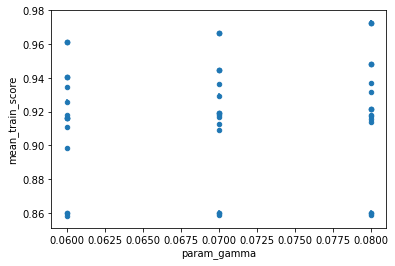

In [27]:
df_svm.plot.scatter("param_gamma",'mean_train_score', yerr="std_train_score")

<AxesSubplot:xlabel='param_gamma', ylabel='mean_test_score'>

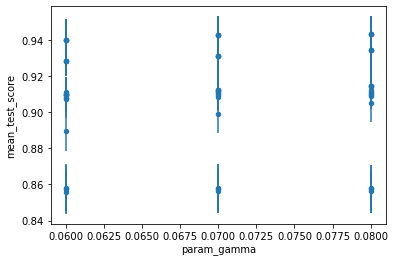

In [28]:
df_svm.plot.scatter("param_gamma",'mean_test_score', yerr="std_test_score")

In [29]:
#mean cross-validated score of the best_estimator
gs_svm.best_score_ 

0.9432693700916704

In [30]:
#parameter setting that gave the best results on the hold out data.
gs_svm.best_params_

{'C': 100, 'degree': 2, 'gamma': 0.08, 'kernel': 'rbf'}

In [31]:
gs_svm.best_estimator_

SVC(C=100, degree=2, gamma=0.08)

### Refit the SVM model with best parameters and make prediction on test data

In [32]:

svm2 = svm.SVC(kernel = 'rbf', #specifies the kernel type to be used in the algorithm,default is 'rbf'
               C=10,          #regularization parameter,defualt is 0.1
               gamma=0.06,     #kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
               degree= 2
              )

svm2.fit(X_train,y_train)
y_pred_svm2 =svm2.predict(X_test)
y_pred_svm2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

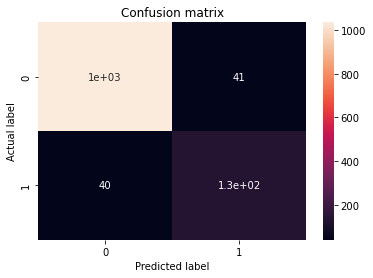

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt 
cm2 = confusion_matrix(y_test,y_pred_svm2)
sns.heatmap(cm2, annot=True)
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [34]:
svm2_acc = accuracy_score(y_test,y_pred_svm2)
print("Optimised SVM: Accuracy",svm2_acc)
svm2_rec = recall_score(y_test,y_pred_svm2)
print("Optimised SVM: Recall score",svm2_rec)
svm2_f1 = f1_score(y_test,y_pred_svm2)
print("Optimised SVM: F1 score",svm2_f1)
svm2_ps = precision_score(y_test,y_pred_svm2)
print("Optimised SVM: Precision score",svm2_ps)

Optimised SVM: Accuracy 0.9352
Optimised SVM: Recall score 0.7701149425287356
Optimised SVM: F1 score 0.7679083094555873
Optimised SVM: Precision score 0.7657142857142857


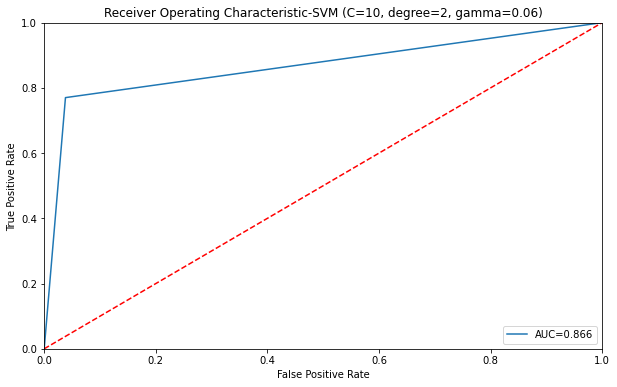

In [35]:
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test,y_pred_svm2)
auc = round(roc_auc_score(y_test,y_pred_svm2),4)

#create ROC curve
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characteristic-SVM (C=10, degree=2, gamma=0.06)')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion 

Since the performance of tuned SVM model is almost same as the base model, we cant say if SVM is the best model for our data.

Also for the SVM model accuracy, recall score, Precision and F1 score are more or less same, in comparison with the Logit Regression, KNN and Decision tree classifiers that we have built.